# Séries de Fourier

Um sinal periódico $s(t)$ pode ser escrito como uma série de Fourier,$$s_N(t) = \frac{A_0}{2} + \sum_{n=1}^N A_n\sin(\tfrac{2\pi n t}{T}+\phi_n).$$
Para calcular os coeficientes da série, é mais conveniente expressá-la usando a relação:$$\sin(\tfrac{2\pi nx}{T}+\phi_n) = \sin(\phi_n) \cos(\tfrac{2\pi n t}{T}) + \cos(\phi_n) \sin(\tfrac{2\pi n t}{T}).$$

Portanto, a série de Fourier pode se escrita em termos de funções $\sin$ e $\cos$,
$$s_N(t) = \frac{A_0}{2} + \sum_{n=1}^N (A_n\cos\phi_n\sin(\tfrac{2\pi n t}{T})+a_n\sin\phi_n\cos(\tfrac{2\pi n t}{T})).$$
Definindo os novos coeficientes $a_n=A_n\cos\phi_n$ e $b_n=A_n\cos\phi_n$, pode-se sintetizar,
$$s_N(t) = a_0 + \sum_{n=1}^N (a_n\sin(\tfrac{2\pi n t}{T})+b_n\cos(\tfrac{2\pi n t}{T})).$$


## Onda triangular

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#onda triangular
def f_am(m):
    m = np.double(m) # converte para double
    am = 0
    return am
def f_bm(m):
    m = np.double(m) # converte para double
    bm = -4 * ( -1 + ( -1 )**( m ) ) * ( m )**( -2 ) * ( np.pi )**( -2 )
    return bm

In [3]:
#esta função só precisa ser definida uma vez
def serie(i0,i1,x):
    serie_somada = 0
    for ii in range(i0,i1):
        serie_somada = serie_somada + f_am(ii)*np.sin(ii*2*np.pi*x/T) + f_bm(ii)*np.cos(ii*2*np.pi*x/T)
    return serie_somada

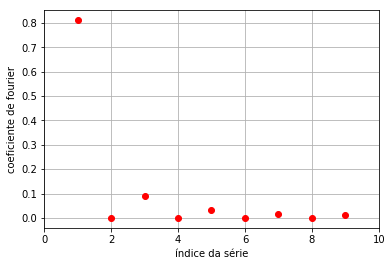

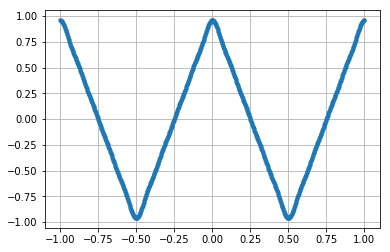

In [5]:
T=1 # periodo da onda
nmax=10 # índice máximo da soma de fourier
tempo=np.linspace(-T,T,1000)
indices = np.array(range(1,nmax))
#grafico dos coeficientes da serie, apenas os termos não-nulos a_m
plt.plot(indices , f_bm(indices),'ro')
plt.xlim([0,nmax])
plt.xlabel('índice da série')
plt.ylabel('coeficiente de fourier' )
plt.grid(True)
plt.show()
#grafico da forma temporal
plt.plot(tempo,serie(1,nmax,tempo),'.-')
#plt.plot(tempo,serie(1,2,tempo),'.-')
#plt.plot(tempo,serie(2,nmax,tempo),'.-')
plt.grid(True)
plt.show()

# Onda quadrada

In [6]:
#onda quadrada ímpar
def f_am(m):
    m = np.double(m)
    am = 4 * ( m )**( -1 ) * ( np.pi )**( -1 ) * ( np.sin( 1/2 * m * np.pi ) )**( 2 )
    return am
def f_bm(m):
    m = np.double(m)
    bm = 0
    return bm

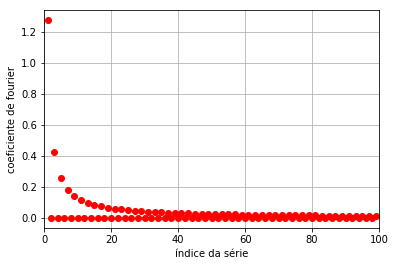

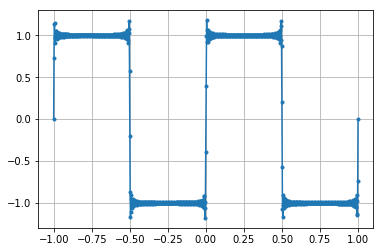

In [7]:
T=1 # periodo da onda
nmax=100 # índice máximo da soma de fourier
tempo=np.linspace(-T,T,1000)
indices = np.array(range(1,nmax))
#grafico dos coeficientes da serie, apenas os termos não-nulos b_m
plt.plot(indices , f_am(indices),'ro')
plt.xlim([0,nmax])
plt.xlabel('índice da série')
plt.ylabel('coeficiente de fourier' )
plt.grid(True)
plt.show()
#grafico da forma temporal
plt.plot(tempo,serie(1,nmax,tempo),'.-')
plt.grid(True)
plt.show()

# Função de transferência

O filtro passa-altas tem a função de transferência dada por $$H(\omega)=\frac{j\omega \tau}{1+j\omega \tau},$$
enquanto que o passa-baixas,
$$H(\omega)=\frac{1}{1+j\omega \tau}.$$
Abaixo são definidas estas duas funções:

In [79]:
#passa baixas
def Hint(omega,tau):
    j = complex(0,1)
    H = 1/(1+j*omega*tau)
    return H
#passa altas
def Hdif(omega,tau):
    j = complex(0,1)
    H = j*omega*tau/(1+j*omega*tau)
    return H

Escrevemos a nossa função $s_N(t)$ como, $$s_N(t) = \frac{A_0}{2} + \sum_{n=1}^N A_n\sin(\tfrac{2\pi n t}{T}+\phi_n).$$ ou em termos de funções $\sin$ e $\cos$,
$$s_N(t) = a_0 + \sum_{n=1}^N (a_n\sin(\tfrac{2\pi n t}{T})+b_n\cos(\tfrac{2\pi n t}{T})).$$

Escrevendo na forma exponencial
$$a_n\sin(\tfrac{2\pi n t}{T}) = a_n\sin(n\omega_0t) = a_n Im(e^{jn\omega_0t})$$
$$b_n\cos(\tfrac{2\pi n t}{T}) = b_n\cos(n\omega_0t) = b_n Re(e^{jn\omega_0t})$$

Ao passar por um filtro, a tensão total na saída será a soma das tensões geradas por cada termo da série

$$s_N(t) = H(0)a_0 + \sum_{n=1}^N H(n\omega_0)a_n Im(e^{jn\omega_0t})+H(n\omega_0)b_n Re(e^{jn\omega_0t}).$$

tal que $H(n\omega_0)= |H(n\omega_0)|e^{j\theta_n}.$

Então teremos que o sinal filtrado será dado por

$$s_N(t) = H(0)a_0 + \sum_{n=1}^N |H(n\omega_0)|a_n Im(e^{jn\omega_0t+ \theta_n})+|H(n\omega_0)|b_n Re(e^{jn\omega_0t+\theta_n}).$$
Ou seja, 
$$s_N(t) = H(0)a_0 + \sum_{n=1}^N |H(n\omega_0)|a_n sin(n\omega_0t+ \theta_n)+|H(n\omega_0)|b_n cos(n\omega_0t+\theta_n).$$

In [80]:
#esta função só precisa ser definida uma vez
def serie_filtrada(i0,i1,x,H):
    serie_somada = 0
    for ii in range(i0,i1):
        omega_ii = ii*2*np.pi/T
        absH  = np.abs(H(omega_ii,tau))
        faseH  = np.angle(H(omega_ii,tau))
        serie_somada = serie_somada + absH*(f_am(ii)*np.cos(omega_ii*x+faseH) + f_bm(ii)*np.sin(omega_ii*x+faseH))
    return serie_somada
#esta função só precisa ser definida uma vez
def serie(i0,i1,x):
    serie_somada = 0
    for ii in range(i0,i1):
        serie_somada = serie_somada + f_am(ii)*np.cos(ii*2*np.pi*x/T) + f_bm(ii)*np.sin(ii*2*np.pi*x/T)
    return serie_somada

## Onda quadrada

In [81]:
#onda quadrada ímpar
def f_am(m):
    am = 0
    return am
def f_bm(m):
    bm = (2*np.sin((m*np.pi)/2.)**2)/(m*np.pi)
    return bm

### Integrador

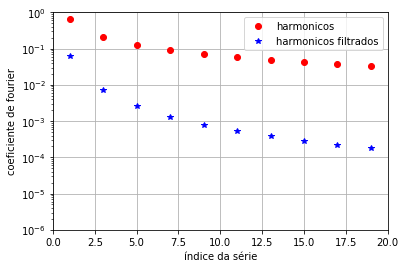

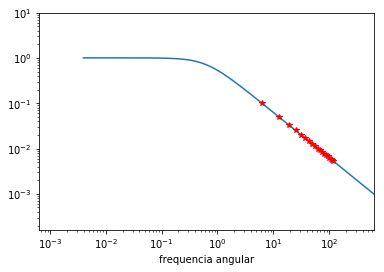

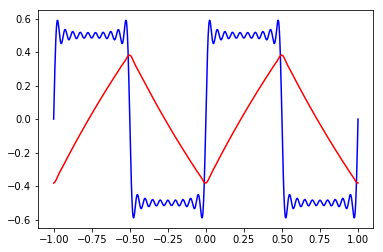

In [89]:
##
#DIAGRAMA DE BODE E POSICIONAMENTO DOS HARMONICOS
#caso de integrador
T=1 # periodo da onda
tau=10/(2*np.pi) #R*C - constante de tempo do curcuito
nmax=20 #numero de termos na série
tempo=np.linspace(-T,T,1000)
indices = np.array(range(1,nmax))
#HARMONICOS
harmonics = (2*np.pi/T)*np.array(range(1,nmax))
plt.semilogy(indices , f_bm(indices),'ro',label='harmonicos')
plt.semilogy(indices , f_bm(indices)*np.abs(Hint(harmonics,tau)),'b*',label='harmonicos filtrados')
plt.xlim([0,nmax])
plt.ylim([1e-6,1])
plt.xlabel('índice da série')
plt.ylabel('coeficiente de fourier' )
plt.grid(True)
plt.legend(loc='upper right')
plt.show()
#BODE
omega = 2*np.pi*np.logspace(np.log10(1e-3/tau),np.log10(1e3/tau),100) # eixo de frequencia
plt.loglog(omega,np.abs(Hint(omega,tau)))
plt.xlim([1e-3/tau,1e3/tau])
plt.ylim([-30,10])
#HARMONICOS
plt.loglog(harmonics,np.abs(Hint(harmonics,tau)),'r*')
plt.xlabel('frequencia angular')
plt.show()
#SERIES DE FOURIER
plt.plot(tempo,serie(1,nmax,tempo),'b-')
plt.plot(tempo,5*serie_filtrada(1,nmax,tempo,Hint),'r-')
plt.show()

### Diferenciador

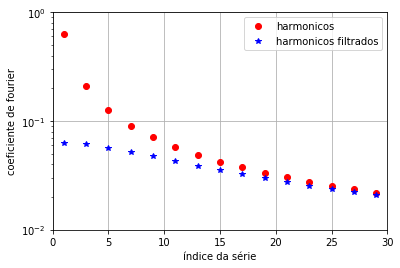

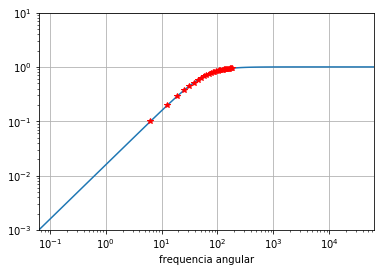

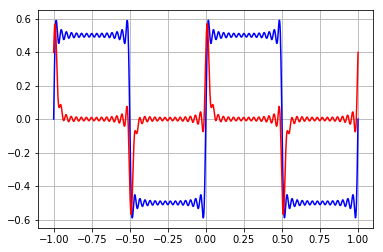

In [90]:
#--------------------
#DIAGRAMA DE BODE E POSICIONAMENTO DOS HARMONICOS
#caso de diferenciador
T=1 # periodo da onda
tau=0.1/(2*np.pi) #R*C - constante de tempo do curcuito
nmax=30 #numero de termos na série
tempo=np.linspace(-T,T,1000)
indices = np.array(range(1,nmax))
#HARMONICOS
harmonics = (2*np.pi/T)*np.array(range(1,nmax))
plt.semilogy(indices , f_bm(indices),'ro',label='harmonicos')
plt.semilogy(indices , f_bm(indices)*np.abs(Hdif(harmonics,tau)),'b*',label='harmonicos filtrados')
plt.xlim([0,nmax])
plt.ylim([1e-2,1])
plt.xlabel('índice da série')
plt.ylabel('coeficiente de fourier' )
plt.grid(True)
plt.legend(loc='upper right')
plt.show()
#BODE
freq = np.logspace(np.log10(1e-3/tau),np.log10(1e3/tau),100) # eixo de frequencia
plt.loglog(freq,np.abs(Hdif(freq,tau)))
plt.xlim([1e-3/tau,1e3/tau])
plt.ylim([-30,10])
#HARMONICOS
plt.loglog(harmonics,np.abs(Hdif(harmonics,tau)),'r*')
plt.xlabel('frequencia angular')
plt.grid(True)
plt.show()
#SERIES DE FOURIER
plt.plot(tempo,serie(1,nmax,tempo),'b-')
plt.plot(tempo,serie_filtrada(1,nmax,tempo,Hdif),'r-')
plt.grid(True)
plt.show()

## Onda triangular

In [92]:
#onda triangular
def f_am(m):
    am = -(((-2 + 2*np.cos(m*np.pi) + m*np.pi*np.sin(m*np.pi)))/(m**2*np.pi**2))
    return am
def f_bm(m):
    bm = 0
    return bm

### Integrador

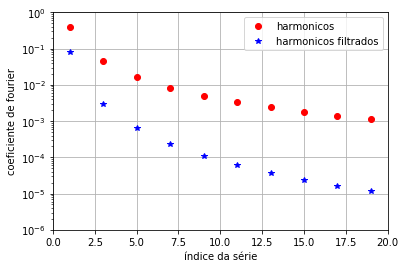

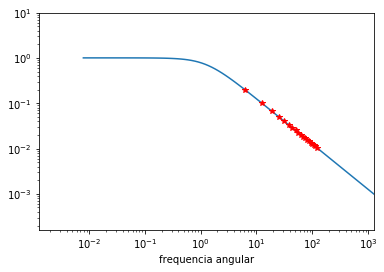

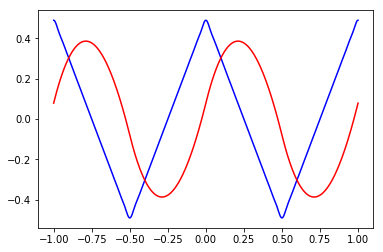

In [93]:
##
#DIAGRAMA DE BODE E POSICIONAMENTO DOS HARMONICOS
#caso de integrador
T=1 # periodo da onda
tau=5/(2*np.pi) #R*C - constante de tempo do curcuito
nmax=20 #numero de termos na série
tempo=np.linspace(-T,T,1000)
indices = np.array(range(1,nmax))
#HARMONICOS
harmonics = (2*np.pi/T)*np.array(range(1,nmax))
plt.semilogy(indices , f_am(indices),'ro',label='harmonicos')
plt.semilogy(indices , f_am(indices)*np.abs(Hint(harmonics,tau)),'b*',label='harmonicos filtrados')
plt.xlim([0,nmax])
plt.ylim([1e-6,1])
plt.xlabel('índice da série')
plt.ylabel('coeficiente de fourier' )
plt.grid(True)
plt.legend(loc='upper right')
plt.show()
#BODE
omega = 2*np.pi*np.logspace(np.log10(1e-3/tau),np.log10(1e3/tau),100) # eixo de frequencia
plt.loglog(omega,np.abs(Hint(omega,tau)))
plt.xlim([1e-3/tau,1e3/tau])
plt.ylim([-30,10])
#HARMONICOS
plt.loglog(harmonics,np.abs(Hint(harmonics,tau)),'r*')
plt.xlabel('frequencia angular')
plt.show()
#SERIES DE FOURIER
plt.plot(tempo,serie(1,nmax,tempo),'b-')
plt.plot(tempo,5*serie_filtrada(1,nmax,tempo,Hint),'r-')
plt.show()

### Diferenciador

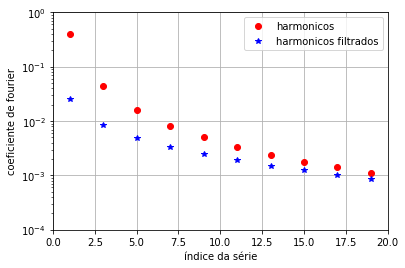

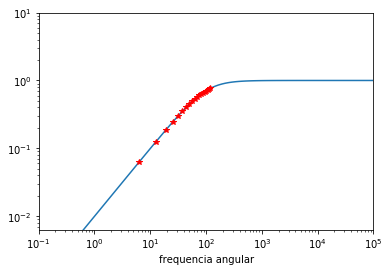

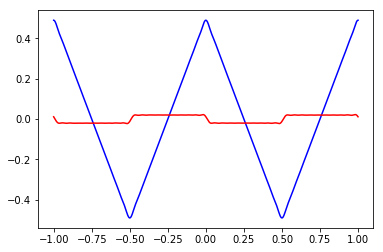

In [65]:
#DIAGRAMA DE BODE E POSICIONAMENTO DOS HARMONICOS
#caso de diferenciador
T=1 # periodo da onda
tau=0.01 #R*C - constante de tempo do curcuito
nmax=20 #numero de termos na série
tempo=np.linspace(-T,T,1000)
#HARMONICOS
harmonics = (2*np.pi/T)*np.array(range(1,nmax))
plt.semilogy(indices , f_am(indices),'ro',label='harmonicos')
plt.semilogy(indices , f_am(indices)*np.abs(Hdif(harmonics,tau)),'b*',label='harmonicos filtrados')
plt.xlim([0,nmax])
plt.ylim([1e-4,1])
plt.xlabel('índice da série')
plt.ylabel('coeficiente de fourier' )
plt.grid(True)
plt.legend(loc='upper right')
plt.show()
#BODE
omega = 2*np.pi*np.logspace(np.log10(1e-3/tau),np.log10(1e3/tau),100) # eixo de frequencia
plt.loglog(omega,np.abs(Hdif(omega,tau)))
plt.xlim([1e-3/tau,1e3/tau])
plt.ylim([-30,10])
#HARMONICOS
plt.loglog(harmonics,np.abs(Hdif(harmonics,tau)),'r*')
plt.xlabel('frequencia angular')
plt.show()
#SERIES DE FOURIER
plt.plot(tempo,serie(1,nmax,tempo),'b-')
plt.plot(tempo,serie_filtrada(1,nmax,tempo,Hdif),'r-')
plt.show()